### SUPERMART SALES

The growth of online supermarkets in most populated cities are increasing and market competitions are also high. Companies are leveraging sales data for forecasting demand as well as are investing heavily in analytics to understand customer behavior. One such organization, ABC Inc. is looking to get answers some of the business questions leveraging sales data from online portal.

Details on data:

Data consists of quarterly sales for year 2019 and quarter 1 (Jan-Mar). There are additional 2 tables for city and product mapping. 
 
Please answer following MCQ’s by performing high level analysis on data provided. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('supermarket_sales.xlsx')

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [4]:
df.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.shape

(1000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,993.0,6.966163,1.719300e+00,4.000000,5.500000,6.900000,8.500000,10.000000


In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
city code                  0
Customer type              0
Gender                     0
Product code               0
Unit price                 4
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     7
dtype: int64

In [9]:
df1=df.dropna()

In [10]:
df1.isnull().sum()

Invoice ID                 0
Branch                     0
city code                  0
Customer type              0
Gender                     0
Product code               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
for i in df.columns:
    if df[i].dtype == object:
         print(i,df[i][df[i] == '-'].count())

Invoice ID 0
Branch 0
city code  0
Customer type 0
Gender 0
Product code 0
Unit price 5
Time 0
Payment 0


In [12]:
df1['Unit price'].unique()

array([74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.84, 73.56, '-', 54.84,
       14.48, 25.51, 46.95, 71.38, 93.72, 68.93, 72.61, 54.67, 40.3,
       86.04, 87.98, 33.2, 34.56, 88.63, 52.59, 33.52, 87.67, 88.36,
       24.89, 94.13, 78.07, 83.78, 96.58, 99.42, 68.12, 62.62, 60.88,
       54.92, 30.12, 86.72, 56.11, 69.12, 98.7, 15.37, 93.96, 56.69,
       20.01, 18.93, 82.63, 91.4, 44.59, 17.87, 15.43, '$', 85.98, 44.34,
       89.6, 72.35, 30.61, 24.74, 55.73, 15.81, 75.74, 15.87, 33.47,
       97.61, 78.77, 18.33, 89.48, 62.12, 48.52, 75.91, 74.67, 41.65,
       49.04, 78.31, 20.38, 99.19, 96.68, 19.25, 80.36, 48.91, 83.06,
       76.52, 49.38, 42.47, 76.99, 47.38, 44.86, 21.98, 64.36, 89.75,
       97.16, 87.87, 12.45, 52.75, 82.7, 48.71, 78.55, 23.07, 58.26,
       30.35, 88.67, 27.38, 62.13, 33.98, 81.97, 16.49, 98.21, 72.84,
       58.07, 80.79, 27.02, 21.94, 51.36, 10.96, 53.44, 99.56, 57.12,
       99.96, 63.91, 56.47, 93.69, 32.25, 31.73, 68.54, 90.28, 39.62,
       92.13, 34

In [13]:
df['Unit price'].replace({'-':np.nan,'$':np.nan,'o':np.nan},inplace=True)

In [14]:
df['Unit price'].nunique()

932

In [15]:
df['Unit price'].isnull().sum()

12

<AxesSubplot:xlabel='Unit price', ylabel='Density'>

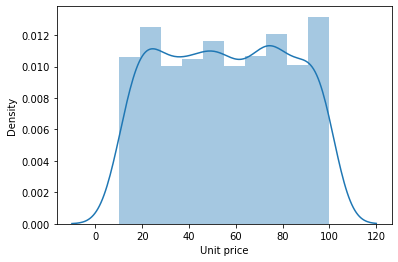

In [16]:
sns.distplot(df['Unit price'])

In [17]:
df['Unit price'].fillna(df['Unit price'].mean(),inplace=True)

In [18]:
df['Unit price'].isnull().sum()

0

In [19]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
city code                  0
Customer type              0
Gender                     0
Product code               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     7
dtype: int64

In [20]:
df['Unit price'].dtype

dtype('float64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [22]:
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  nan,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  8.2,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,
        4. ,  8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,
        9. ,  8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

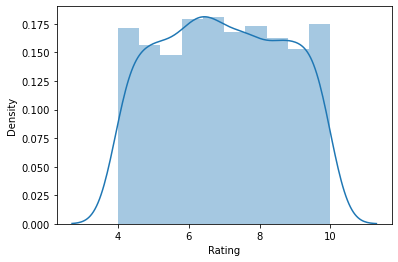

In [23]:
sns.distplot(df['Rating'])

In [24]:
df['Rating'].skew()

0.014329209449532133

In [25]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [26]:
df.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [28]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
city code                  0
Customer type              0
Gender                     0
Product code               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

##### •	Which city saw maximum total sales in Jan-Feb month of 2019?
1.	Mandalay 
2.	Naypyitaw  
3.	Yangon
4.	None of the above


In [49]:
df.head(2)

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday


In [30]:
df.columns

Index(['Invoice ID', 'Branch', 'city code ', 'Customer type', 'Gender', 'Product code', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'], dtype='object')

In [31]:
df['city code '].value_counts()

CT1    340
CT9    332
CT3    328
Name: city code , dtype: int64

In [54]:
df['month']=df['Date'].dt.month_name()

In [55]:
df.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,month
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


<AxesSubplot:xlabel='month,city code '>

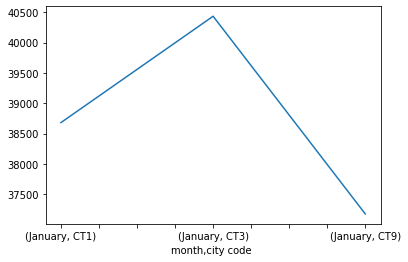

In [80]:
df[(df['month']=='January') | (df['month']=='February') & (df['Date']==2019)].groupby(['month','city code '])['Total'].sum().plot()

- Naypyitaw

#### •	What is the % of total spending by Member customer type for the entire time period?
1.	25%
2.	50%
3.	75%
4.	90%


In [48]:
df[df['Customer type']=='Member']['Total'].sum()/df['Total'].sum()*100

50.8484060691957

#### •	Which product line attracts more spending by women customers?
1.	Home and lifestyle	
2.	Health and beauty
3.	Food and beverages
4.	Electronic accessories


In [33]:
df.head(2)

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6


In [34]:
d=df[df['Gender']=='Female']

In [35]:
d.groupby('Product code')['Total'].sum().sort_values(ascending=False)

Product code
PD5    33170.9175
PD6    30437.4000
PD3    30036.8775
PD4    28574.7210
PD2    27102.0225
PD1    18560.9865
Name: Total, dtype: float64

<AxesSubplot:xlabel='Product code'>

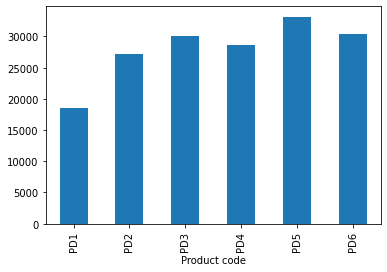

In [36]:
d.groupby('Product code')['Total'].sum().plot(kind='bar')

- Food and beverages product line attracts more spending by women customer

#### •	Which day of week saw a greatest number of male customers as compared to number of male customers on other days?
1.	Monday
2.	Tuesday
3.	Wednesday
4.	Sunday


In [37]:
df['Weekday']=df['Date'].dt.day_name()

In [38]:
df.head()

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday


In [39]:
df[df['Gender']=='Male']['Weekday'].value_counts()

Wednesday    79
Saturday     77
Thursday     75
Friday       74
Tuesday      71
Sunday       66
Monday       57
Name: Weekday, dtype: int64

In [40]:
df.groupby('Weekday')['Gender'].value_counts(ascending=False)

Weekday    Gender
Friday     Male      74
           Female    65
Monday     Female    68
           Male      57
Saturday   Female    87
           Male      77
Sunday     Female    67
           Male      66
Thursday   Male      75
           Female    63
Tuesday    Female    87
           Male      71
Wednesday  Male      79
           Female    64
Name: Gender, dtype: int64

- Wednesday

#### •	What is contribution of branch C of total sales?
1.	45%
2.	54%
3.	34%
4.	65%


In [41]:
df.head(2)

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday


In [42]:
df[df['Branch']=='C']['Total'].sum()/df['Total'].sum()*100

34.23532200833467

#### •	What would be the right strategy to handle invalid data points for Unit Price:
1.	Remove records as there are only few records
2.	Impute values with Mean/Median Unit Price for given product
3.	Impute values with unit price with Zero (0) since the data is imbalanced
4.	None of the above


- 2

#### •	From the Given data which of the following statement is True:
1.	On an average Male buyers provide higher ratings
2.	On an average Female buyers provide higher ratings
3.	There is no significant difference in ratings by gender
4.	None of the above


In [43]:
df.groupby('Gender')['Rating'].count()

Gender
Female    501
Male      499
Name: Rating, dtype: int64

- 2

#### •	From the data what is the distribution of Rating?
1.	Normally distributed
2.	Right skewed
3.	Left skewed
4.	Binomial distribution


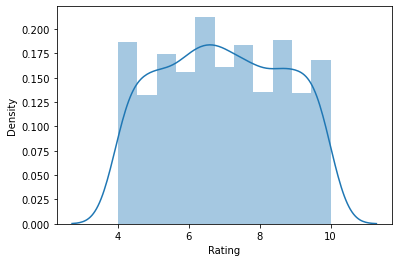

In [44]:
sns.distplot(df['Rating'])
plt.show()

- 1

#### •	Which of the following correlation will best describe relation between day of the week and mode of payment?
1.	Pearson correlation coefficient
2.	Biserial correlation coefficient
3.	phi contingency coefficient
4.	Spearman's rank correlation coefficient


- 2

#### •	What data preprocessing method is needed for Product code to train a machine learning algorithm
1.	One- hot encoding
2.	Label encoding
3.	Dummy encoding
4.	Encoding is not needed


In [45]:
df['Product code'].value_counts()

PD6    178
PD5    174
PD2    170
PD4    166
PD3    160
PD1    152
Name: Product code, dtype: int64

- 3

#### Stats Questions

#### 1.	In a colony, there are 55 members. Every member posts a greeting card to all the members. How many greeting cards were posted by them?
a) 990
b) 890
c) 2970
d) 1980


In [46]:
55*54

2970

#### 2.	Blood test failing to detect the disease in a patient who really has the disease is what type of error?
a)	Type 1 Error
b)	Type 2 Error
c)	Standard Error
d)	Sampling Error


b. Type 2 error

#### 3.	For a particular set of data, the mean is less than the median. Which of the following statements is most consistent with this information?
a)	The distribution of the data is skewed to the right
b)	The distribution of the data is skewed to the left
c)	The distribution of the data is symmetric
d)	"mean is less 

b.The distribution of the data is skewed to the left

#### 4.	Which of the following is true about the adjusted R2?
a)	It is usually larger than the R2
b)	It is only used when there is just one predictor
c)	It is usually smaller than the R2
d)	It is used to determine whether residuals are normally distributed


c) It is usually smaller than the R2